In [1]:

import random

def normal_generator(n):
    # Normalize the probabilities to ensure they sum up to 1
    arr = [0.03461954561846376, 0.02091597547782184, 0.012982329606923913, 0.007573025604038951, 0.0054093040028849616, 0.006851785070320947, 0.01226108907320591, 0.017309772809231867, 0.02524341868012982, 0.035701406419040745, 0.0439956725567977, 0.05301117922827262, 0.05878110349801659, 0.06130544536602957, 0.061666065632888574, 0.06274792643346555, 0.06419040750090155, 0.06851785070320952, 0.0714028128380815, 0.06959971150378651, 0.06527226830147854, 0.05733862243058059, 0.04688063469166967, 0.03642264695275875]
     

    total_probability = sum(arr)
    normalized_probabilities = [prob / total_probability for prob in arr]

    # Generate n random numbers using the normalized probabilities
    random_numbers = random.choices(range(24), weights=normalized_probabilities, k=n)

    return random_numbers

# Example usage:
n=5

random_numbers = normal_generator( n)
print("Generated random numbers:", random_numbers)


Generated random numbers: [17, 8, 20, 20, 20]


In [2]:
import math
def sample_generator(sample):
    arr = [0.03461954561846376, 0.02091597547782184, 0.012982329606923913, 0.007573025604038951, 0.0054093040028849616, 0.006851785070320947, 0.01226108907320591, 0.017309772809231867, 0.02524341868012982, 0.035701406419040745, 0.0439956725567977, 0.05301117922827262, 0.05878110349801659, 0.06130544536602957, 0.061666065632888574, 0.06274792643346555, 0.06419040750090155, 0.06851785070320952, 0.0714028128380815, 0.06959971150378651, 0.06527226830147854, 0.05733862243058059, 0.04688063469166967, 0.03642264695275875]

    for i in range(len(arr)):
        arr[i]=math.ceil(sample*arr[i])
    kr=[]
    for i in range(24):
        for k in range(arr[i]):
            kr.append(i)
    
    return arr

In [3]:
import math
def rectangle(q,d,t_start):
    
    arr=[0]*24
    
    def pulse(arr,q,t_start,t_stop):
        for i in range(t_start, t_stop):
            arr[i]=q+arr[i]
        return arr
    while d>0:
        if t_start+d<24:
            arr=pulse(arr,q,t_start,t_start+d)
            d=0
        else:
            arr=pulse(arr,q,t_start,24)
            d=d-(24-t_start)
    
    return arr
        

In [4]:

def lognormal_generator(sample, mean_lognormal):
    mu = np.log(mean_lognormal) - 0.5 * np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)
    sigma_squared = np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)

# Calculate mean and variance of the lognormal distribution
    m = np.exp(mu + 0.5 * sigma_squared)
    v = (np.exp(sigma_squared) - 1) * np.exp(2 * mu + sigma_squared)

    data = np.random.lognormal(mean=mu, sigma=np.sqrt(sigma_squared), size=sample)
    
    return data

In [5]:
import numpy as np
d_=[1/70,1/56,1/32,1/8]
q_=[11.5,9.6,7.7,1.4]
def sum_sample(sample,d_mean,car_type):
    samples=normal_generator(sample)
    d_samples=lognormal_generator(sample,d_mean)
    ans=[0]*24

    for i in range(sample):
        pulse=rectangle(q_[car_type],math.ceil(d_mean*d_[car_type]),samples[i])
        for j in range(24):
            ans[j]=ans[j]+pulse[j]
    return ans 


In [6]:
import pandas as pd
data = pd.read_csv('ridership data.csv')
dict={}
data=data.to_numpy()
for i in range(len(data)) :
    area=data[i][0]
    area_dist=data[i][1]
    dict[area]=area_dist
names =['Civil Lines', 'Gandhi Nagar', 'Chanakyapuri', 'Alipur', 'Karawal Nagar', 'Kanjhawala', 'Seemapuri', 'Hauz Khas', 'Defence Colony', 'Dwarka', 'Patel Nagar', 'Karol Bagh', 'Mayur Vihar', 'Delhi Cantonment', 'Model Town', 'Seelampur', 'Rohini', 'Shahdara', 'Mehrauli', 'Kalkaji', 'Kapashera', 'Punjabi Bagh', 'Kotwali', 'Preet Vihar', 'Vasant Vihar', 'Narela', 'Yamuna Vihar', 'Saraswati Vihar', 'Vivek Vihar', 'Saket', 'Sarita Vihar', 'Najafgarh', 'Rajouri Garden']

In [7]:
print(dict)

{'Civil Lines': 11.9, 'Karol Bagh': 11.2, 'Kotwali': 10.9, 'Gandhi Nagar': 10.6, 'Mayur Vihar': 10.3, 'Preet Vihar': 10.1, 'Chanakyapuri': 9.9, 'Delhi Cantonment': 9.7, 'Vasant Vihar': 9.6, 'Alipur': 9.4, 'Model Town': 9.3, 'Narela': 9.1, 'Karawal Nagar': 9.0, 'Seelampur': 8.8, 'Yamuna Vihar': 8.7, 'Kanjhawala': 8.6, 'Rohini': 8.5, 'Saraswati Vihar': 8.4, 'Seemapuri': 8.3, 'Shahdara': 8.2, 'Vivek Vihar': 8.1, 'Hauz Khas': 8.0, 'Mehrauli': 7.9, 'Saket': 7.8, 'Defence Colony': 7.7, 'Kalkaji': 7.6, 'Sarita Vihar': 7.5, 'Dwarka': 7.3, 'Kapashera': 7.2, 'Najafgarh': 7.1, 'Patel Nagar': 7.0, 'Punjabi Bagh': 6.9, 'Rajouri Garden': 6.8}


In [8]:
def add_arrays(array1, array2):
    # Check if the arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length for addition.")
    
    # Use a list comprehension to add corresponding elements
    result_array = [x + y for x, y in zip(array1, array2)]
    
    return result_array

In [9]:

def load_profile(sample_array):
    load_final=[]
    for i in range(len(names)):
        profile_i=[0]*24
        d=dict[names[i]]
        for j in range(4):
            sample=sample_array[i][j]
            profile_i=add_arrays(sum_sample(sample,d,j),profile_i)
        load_final.append(profile_i)
    return load_final

In [10]:
sum_sample(631,9.7,0)

[241.5,
 172.5,
 69.0,
 23.0,
 0,
 126.5,
 92.0,
 103.5,
 264.5,
 299.0,
 287.5,
 379.5,
 437.0,
 598.0,
 437.0,
 471.5,
 391.0,
 483.0,
 460.0,
 379.5,
 437.0,
 494.5,
 356.5,
 253.0]

In [11]:
loaded_data = np.loadtxt('output_cars.txt', delimiter=' ').reshape(1000, 33, 4)


In [40]:
loaded_data = np.loadtxt('output.txt', delimiter=' ').reshape(1000, 33, 4)


In [12]:
import numpy as np
final_arr=[]
for i in range(1000):
# The original array
    original_array = np.array(loaded_data[i])

    # Convert the array to integers
    integer_array = original_array.astype(int)
    final_arr.append(integer_array)
# Print the resulting integer array
print(integer_array)

[[  1789   2393  41754  53941]
 [  1055   5660  22503  76771]
 [   972   8848   8525  15553]
 [  5493  15558  13898  22421]
 [  3724  10678  36997  18428]
 [  2812   8357  15065  29296]
 [  8092  12887  36631  34737]
 [   586   3475  20184  12501]
 [   631   7820   8283  25599]
 [  4944  21111  15885  69083]
 [   593  13639  21561  78534]
 [  1780  17184  33953  38606]
 [   619   2761  23595  40890]
 [  4423   4729  10175  24280]
 [ 11741  12641  49148  42159]
 [  3215  23302  66766 107285]
 [   644   7230  16817 205336]
 [  2129   1425  12503  95010]
 [   895  12740  38173  30435]
 [  5113   7322  16445  40893]
 [ 10849   9000  25820  25864]
 [  6558   3308  10420  67137]
 [ 13209  12361  37550  38028]
 [   500   1775  35746  74192]
 [  2837   5066  10556  30077]
 [ 10069   1242   4484 189194]
 [  2479   5388  28362  79740]
 [  8016   6128  33944  32410]
 [  2268   9075  18615  57208]
 [  6299  10882  23585  25537]
 [  4611  18839  21078  25561]
 [  7024    910  41043 154732]
 [  2244

In [13]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

3147084


In [14]:
print(final_arr[93])

[[ 18430   5732  32865  55017]
 [  1466   6027  17838  78976]
 [  7076    976  14824  22464]
 [   500   9865  17411  16028]
 [  4322  20366   9656  53347]
 [  1414  16264   5152  38205]
 [ 14829   3543  27523  23451]
 [  7568   8532   4586  32272]
 [  7621   8177   4430  28488]
 [   541  13301  32229  44080]
 [  2894   9818  65377  50332]
 [   689  13056  40506  50649]
 [  1028  24142  39488  35406]
 [  2426   6798   1504  28236]
 [  3074   2404  20711  67246]
 [   952  15693  37683  25592]
 [   677   1231  10838 184747]
 [  9436   8482  25081  64679]
 [ 12773   2257  40865  15892]
 [  1861  12507  21933  31759]
 [  4188   7820  27431   2381]
 [  1566   3091  38348  30046]
 [  2138   4163  31483  50341]
 [  1485   6537  45206  66406]
 [   535   3393  24777  21515]
 [ 10853  17083  48629 152675]
 [  4603  18715   8934 113729]
 [  3996   5632  10735  44110]
 [   802  11736  27462  71661]
 [   633   1597  13306  31566]
 [  2479  16452  16884  62338]
 [  3751   4376   8734 226498]
 [  1607

In [15]:
percentages = [ 1.32694089,  0.72670791,  0.2850466,   0.19668465]
for i in range(1000):
    for j in range(33):
        final_arr[i][j][0]=int(final_arr[i][j][0]*0.19668465)
        final_arr[i][j][1]=int(final_arr[i][j][1]*0.2850466)
        final_arr[i][j][2]=int(final_arr[i][j][2]*0.72670791)
        final_arr[i][j][3]=int(final_arr[i][j][3]*1.32694089)

In [16]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

3224199


In [17]:
res1=load_profile(integer_array)

In [18]:
print(res1)

[[11750.800000000014, 10641.499999999744, 6817.800000000127, 3966.200000000064, 2676.100000000012, 3056.00000000001, 5003.000000000035, 7116.100000000084, 10406.900000000056, 15159.199999999579, 18679.999999999254, 22817.499999999025, 25285.399999998746, 27165.799999998628, 27850.299999998584, 27271.999999998494, 28695.199999998513, 29985.399999998335, 31257.499999998174, 30482.699999998185, 28973.399999998313, 26316.39999999845, 21949.699999998622, 21304.999999998734], [9922.29999999992, 11063.299999999166, 6889.699999999998, 4097.700000000112, 2624.6000000000404, 2713.4000000000356, 4662.100000000107, 6659.400000000158, 9674.499999999682, 13418.299999998977, 17653.799999998246, 20968.999999997577, 24462.599999997045, 25888.099999997554, 27016.79999999839, 26809.299999998402, 27657.599999998623, 28886.099999999722, 30406.100000000726, 29883.800000000607, 28436.999999999854, 25427.49999999811, 21296.29999999735, 22500.099999997878], [3580.599999999996, 3107.1000000000263, 1960.69999999

In [19]:
result_=[]
for j in range(200):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [20]:
for j in range(200,400):
    arr155= load_profile(final_arr[j])
    result_.append(arr155)
    

In [21]:
for j in range(400,600):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [54]:
for j in range(600,800):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [55]:
for j in range(800,1000):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def graph(area):
    arr_d12=[]
    for i in range(600):
        arr_d12.append(result_[i][area])
    # Generating random 2D array for demonstration purposes
    num_arrays = 600
    array_length = 24

    # Replace this line with your actual data
    data = np.array(arr_d12)
    # Create a box plot for each 1D array across the 24 indexes
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

    # Customize the plot
    ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
    ax.set_xlabel('hours in 24 hr format')
    ax.set_ylabel('load in kW')

    # Add legend
    legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                       plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                       plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                       ]
    ax.legend(handles=legend_elements, loc='upper right')



    # Add mean, median, and quartile labels
    ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )


    plt.show()


In [24]:
arr_d12=[]
for i in range(600):
    arr_d12.append(result_[i][0])

TypeError: 'dict' object is not callable

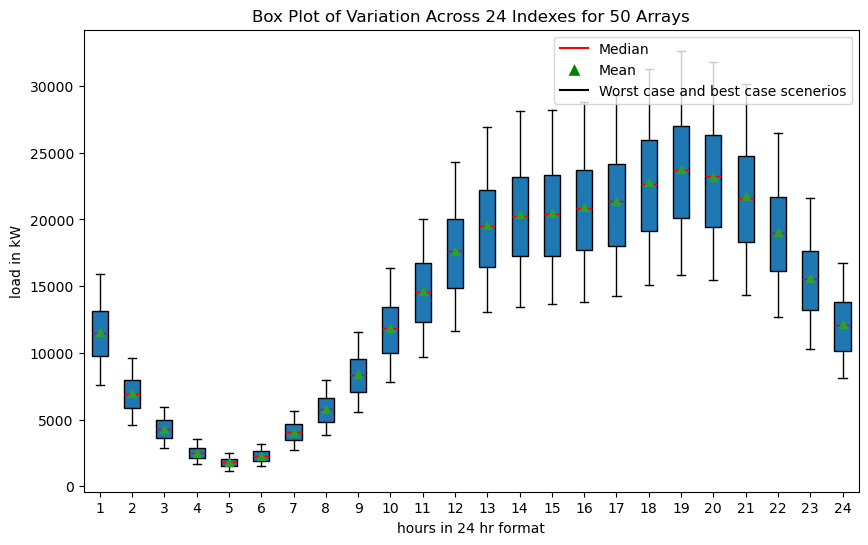

In [25]:
graph(32)

In [58]:
arr_d12=[]

In [66]:
peak=[]
for i in range(1000):
    peak.append(max(delhi[i]))

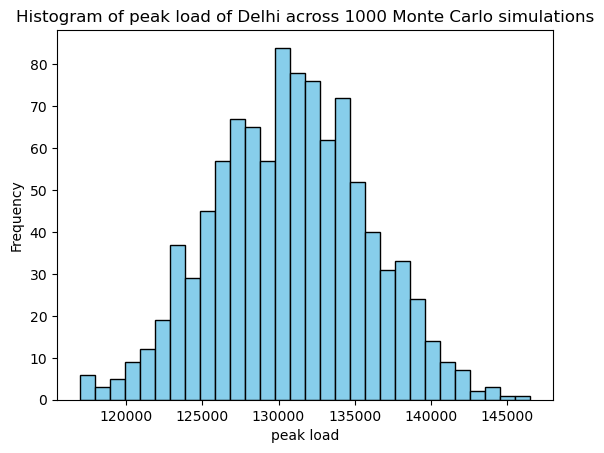

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'peak_load_data' with your actual 1D array
peak_load_data = np.array(peak)

# Create a histogram
plt.hist(peak_load_data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('peak load')
plt.ylabel('Frequency')
plt.title('Histogram of peak load of Delhi across 1000 Monte Carlo simulations' )

# Show the plot
plt.show()


In [90]:
print(len(arr_d1))

0


In [77]:
print(len(result_))

23


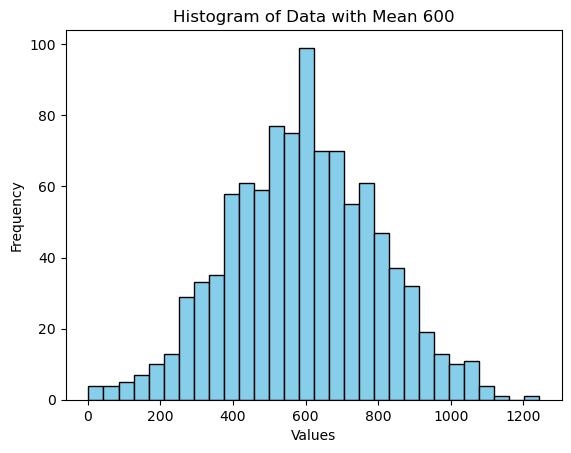

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with a mean of 600
data = np.random.normal(loc=600, scale=200, size=1000)

# Create a histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Mean 600')

# Show the plot
plt.show()


In [89]:
print(len(result_))

1000


In [62]:
delhi=[]
for i in range(1000):
    arr=[0]*24
    for j in range(33):
        arr=add_arrays(arr,result_[i][j])
    delhi.append(arr)

TypeError: 'dict' object is not callable

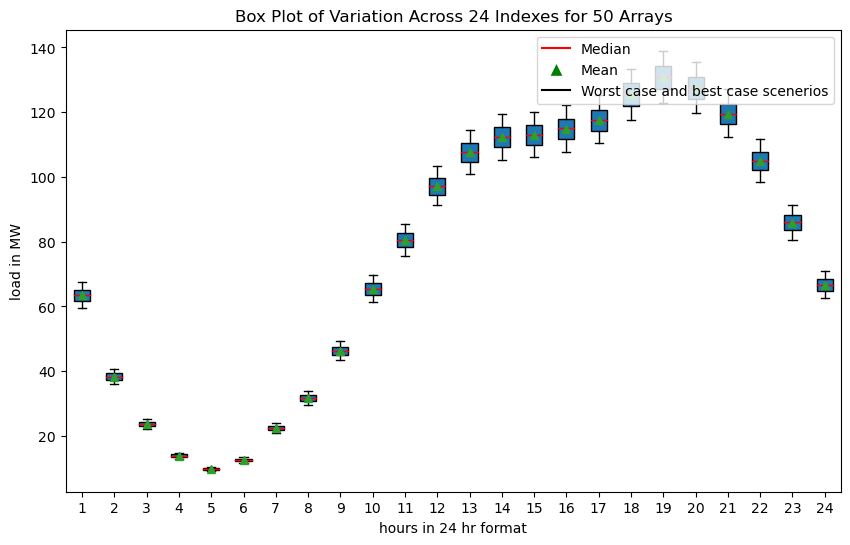

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(delhi)
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format')
ax.set_ylabel('load in MW')

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')



# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


In [100]:
print(delhi[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [135]:
import numpy as np

# Assuming your 3D array is named 'three_d_array'
# and it has the shape (1000, rows, columns)
# Replace 'three_d_array' with the actual name of your array

# Example: Creating a dummy 3D array with shape (1000, 3, 3)
three_d_array = np.array(result_)

# Define the filename for the text file
file_path = 'output_loadprofile.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate through each 2D array in the 3D array
    for i in range(three_d_array.shape[0]):
        # Convert the 2D array to a string
        array_str = np.array2string(three_d_array[i], separator=', ', precision=2, suppress_small=True)

        # Write the string representation of the 2D array to the file
        file.write(f"Array {i + 1}:\n")
        file.write(array_str)
        file.write('\n\n')


In [70]:
a=[]
for i in range(33):
    arr_ai=[]
    for i in range(1000):
        arr_ai.append(result_[i][j])
    a.append(arr_ai)
        
    

In [76]:
print(a[3][100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


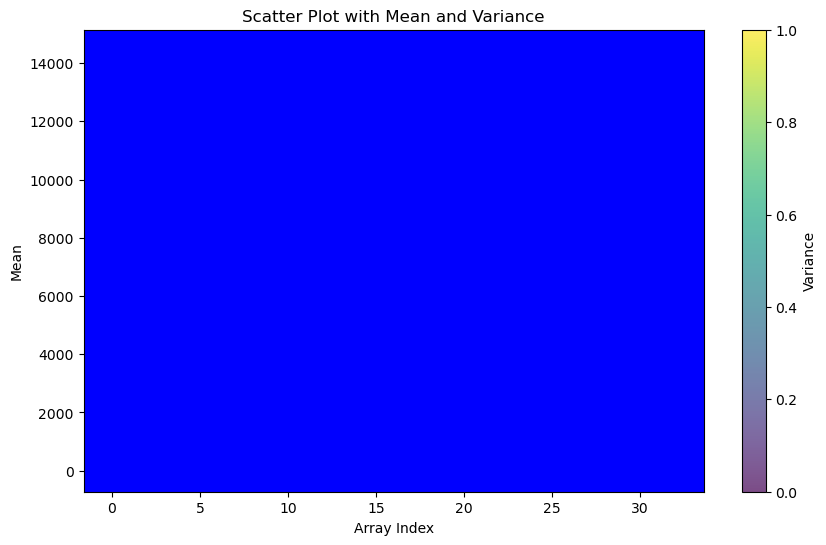

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 33 1D arrays with 1000 elements each
# Replace 'data' with your actual data

# Example: Creating dummy data
data = np.array(a_max)
# Calculate mean and variance for each 1D array
mean_values = np.mean(data, axis=1)
variance_values = np.var(data, axis=1)

# Plot scatter plot with mean as y-axis and variance as point size
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mean_values)), mean_values, s=variance_values * 100, c='blue', alpha=0.7)

# Set labels and title
plt.title('Scatter Plot with Mean and Variance')
plt.xlabel('Array Index')
plt.ylabel('Mean')
plt.colorbar(label='Variance')

plt.show()


In [88]:
print(mean_values)

[ 5217.6642  6399.8704  1934.2218  2508.4402  4344.6102  2930.2826
  4429.3326  2336.264      0.         0.         0.      5785.3852
  7595.5208  2099.7074  5357.1924 10793.2636 14425.3144  7605.0352
     0.         0.         0.         0.      4549.7956  6692.6482
  2983.3174 14165.7068  8474.2882  4068.197   6298.6196     0.
     0.         0.         0.    ]


In [74]:
print(result_[100][3])

[978.599999999989, 548.799999999996, 327.59999999999957, 226.8000000000006, 131.60000000000022, 187.60000000000045, 337.3999999999994, 499.79999999999677, 663.5999999999941, 1009.3999999999885, 1180.1999999999985, 1478.4000000000178, 1621.200000000027, 1682.800000000031, 1834.000000000041, 1699.6000000000322, 1906.8000000000457, 1961.4000000000492, 2002.0000000000518, 2009.0000000000523, 1800.4000000000387, 1629.6000000000276, 1313.200000000007, 1070.9999999999914]


In [80]:
a_max=[]
for i in range(33):
    a_m=[]
    for j in range(1000):
        a_m.append(max(result_[j][i]))
    a_max.append(a_m)
        

In [81]:
print(a_max[0])

[4116.000000000183, 7037.799999999424, 5044.199999999942, 6465.199999999572, 6178.199999999647, 6159.999999999652, 6872.5999999994665, 2496.200000000084, 5732.999999999763, 4543.000000000072, 6901.999999999459, 6693.399999999513, 4288.200000000138, 5396.99999999985, 2660.0000000000946, 2105.6000000000586, 6481.999999999568, 5135.199999999918, 6103.999999999666, 3662.4000000001597, 3805.200000000169, 3670.8000000001603, 3673.6000000001604, 6640.199999999527, 6963.599999999443, 4291.000000000137, 4158.000000000172, 5017.5999999999485, 6078.799999999673, 6969.199999999441, 5081.999999999932, 6697.599999999512, 4673.200000000038, 6953.799999999445, 7012.59999999943, 6010.199999999691, 4888.799999999982, 3199.0000000001296, 3740.800000000165, 3754.8000000001657, 6238.399999999631, 4634.000000000048, 4947.599999999967, 6974.79999999944, 6353.1999999996015, 6017.199999999689, 3698.800000000162, 3661.0000000001596, 4114.600000000183, 5066.599999999936, 6990.199999999436, 4663.400000000041, 643